# Assignment9_HCordoba

## This assignment is for explaining all what I undestood in class

#### Putting all the libraries at first

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 


####  Importing the external files

In [6]:
ExternalFilesFolder =  r"C:\Users\gelli\Desktop\POLIMI FIRST YEAR\ENERGY AND ENVIRONMENTAL SYSTEM FOR BUILDINGS\Files solved in Python\Week 9"
ConsumptionFileName= "consumption_5545.csv"
TemperatureFileName= "Austin_weather_2014.csv"
IrradianceFileName= "irradiance_2014_gen.csv"

path_consumptionFile = os.path.join(ExternalFilesFolder,ConsumptionFileName)
path_TemperatureFile = os.path.join(ExternalFilesFolder,TemperatureFileName)
path_IrradianceFile = os.path.join(ExternalFilesFolder,IrradianceFileName)

#### Reading the consumption

In [7]:
DF_consumption = pd.read_csv(path_consumptionFile,sep=",", index_col=0)

#### This shows me the head of the consumption

In [8]:
DF_consumption.head()

,air conditioner_5545
2014-01-01 06:00:00,0.0
2014-01-01 07:00:00,0.0
2014-01-01 08:00:00,0.0
2014-01-01 09:00:00,0.0
2014-01-01 10:00:00,0.0


#### This shows me the last 10 values of my consumption

In [9]:
DF_consumption.tail(10)

,air conditioner_5545
2014-12-30 20:00:00,0.0
2014-12-30 21:00:00,0.0
2014-12-30 22:00:00,0.0
2014-12-30 23:00:00,0.0
2014-12-31 00:00:00,0.0
2014-12-31 01:00:00,NaN
2014-12-31 02:00:00,NaN
2014-12-31 03:00:00,NaN
2014-12-31 04:00:00,NaN
2014-12-31 05:00:00,NaN


#### Convert with pandas our index, from column to date-time


In [11]:
PreviousIndex = DF_consumption.index
NewParsedIndex= pd.to_datetime(PreviousIndex)
DF_consumption.index =NewParsedIndex 

#### These commands show me the index of the hour, month and day of the week of my consumption

In [16]:
DF_consumption.index.hour

Int64Index([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
            ...
            20, 21, 22, 23,  0,  1,  2,  3,  4,  5],
           dtype='int64', length=8736)

In [17]:
DF_consumption.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', length=8736)

In [18]:
DF_consumption.index.dayofweek

Int64Index([2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
            ...
            1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
           dtype='int64', length=8736)

#### Now we plot out consumption in some specific dates that we are selected. We have two ways or function to do it. At the end, should be the same plot.

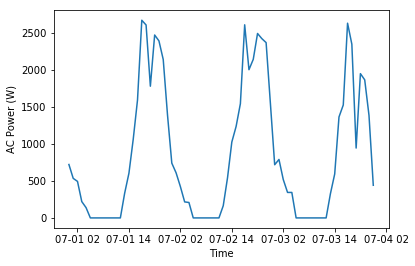

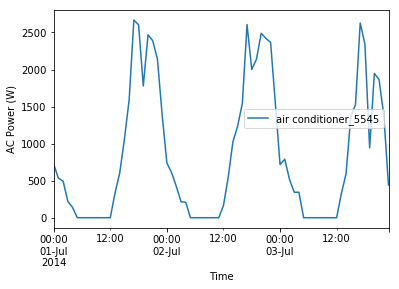

In [20]:
DF_consumption_someDaysInJuly=DF_consumption["2014-07-01 00:00:00":"2014-07-03 23:00:00"]

plt.figure()
plt.plot(DF_consumption_someDaysInJuly)
plt.xlabel("Time")
plt.ylabel("AC Power (W)")
plt.show()


DF_consumption_someDaysInJuly.plot()
plt.xlabel("Time")
plt.ylabel("AC Power (W)")
plt.show()


#### Importing weather data- Temperature. Reading the temperature from the external file, aplying the datetime to the index and then show some values of the temperature.

In [21]:
DF_weather = pd.read_csv(path_TemperatureFile,sep=";",index_col=0)
DF_weather.head(24)
previousIndex_weather=DF_weather.index
newIndex_weather=pd.to_datetime(previousIndex_weather)
DF_weather.index = newIndex_weather
DF_weather.columns
Series_Temperature = DF_weather["temperature"]

DF_Temperature= DF_weather[["temperature"]]
DF_Temperature.head()

,temperature
localhour,
2014-01-01 06:00:00,40.36
2014-01-01 07:00:00,38.11
2014-01-01 08:00:00,38.65
2014-01-01 09:00:00,38.47
2014-01-01 10:00:00,38.00


#### Importing Irradiance Source- Generation. Reading the generation from the external file, aplying the datetime to the index and then show some values of the generation to see it works.

In [22]:
DF_irradianceSource = pd.read_csv(path_IrradianceFile,sep=";",index_col=1)
DF_irradianceSource.head(24)

DF_irradiance=DF_irradianceSource[["gen"]]
DF_irradiance.head(24)

DF_irradiance["gen"]<0
DF_irradiance[DF_irradiance["gen"]<0] = 0
DF_irradiance.head(24)

C:\Users\gelli\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\gelli\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\pandas\core\frame.py:2346: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer(indexer, value)
C:\Users\gelli\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\pandas\core\frame.py:2326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.or

,gen
localhour,
2014-01-01 00:00:00,0.000000
2014-01-01 01:00:00,0.000000
2014-01-01 02:00:00,0.000000
2014-01-01 03:00:00,0.000000
2014-01-01 04:00:00,0.000000
2014-01-01 05:00:00,0.000000
2014-01-01 06:00:00,0.000000
2014-01-01 07:00:00,0.052800
2014-01-01 08:00:00,0.773583


#### We joined in a plot the consumption, temperature and generation

In [23]:
DF_joined = DF_consumption.join([DF_Temperature,DF_irradiance])
DF_joined.head(24)

DF_joined_cleaned = DF_joined.dropna()
DF_joined_cleaned.head(24)
DF_joined_cleaned_copy = DF_joined.dropna().copy()

#### Then we do the same but we assign a variable to only the selected dates, also we use .dropna in order to remove missing values

#### With . describe(), we apply this to describe statistics that summarize the tendency of the values on that selected dates

In [24]:
DF_joined_cleanedchosenDates=DF_joined_cleaned_copy["2014-08-01":"2014-08-02"]

DF_joined_cleanedchosenDates["temperature"]=DF_joined_cleanedchosenDates["temperature"].shift(-5)
DF_joined_cleanedchosenDates.dropna()
DF_joined_cleanedchosenDates.head()
DF_joined_cleanedchosenDates.describe()

C:\Users\gelli\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,air conditioner_5545,temperature,gen
count,48.000000,43.000000,48.000000
mean,694.410764,78.729767,1.143401
std,774.386052,6.499446,1.428003
min,0.000000,67.390000,0.000000
25%,0.000000,73.845000,0.000000
50%,484.775000,77.340000,0.278442
75%,1157.812500,85.440000,2.303383
max,2371.566667,88.980000,4.165450


#### Then we normalized all the variables but in this case we only apply the function to one day in order to explained how it was normalized

In [26]:
DF_joined_cleanedchosenDates.min()
DF_joined_cleanedchosenDates.max()
DF_joined_cleanedchosenDates_normalized=(DF_joined_cleanedchosenDates-DF_joined_cleanedchosenDates.min())/(DF_joined_cleanedchosenDates.max()-DF_joined_cleanedchosenDates.min())

DF_joined_cleanedchosenDates_normalized.plot()

#### Creating Lagged features, but first we reconstuct the dataframe and the we are correcting the time hour using the function shift()-

In [35]:
DF_joined = DF_consumption.join([DF_Temperature,DF_irradiance])
DF_mod=DF_joined.copy() 
DF_mod["temperature"]=DF_mod["temperature"].shift(-5)
DF_mod.dropna(inplace=True) 
DF_mod=DF_mod.dropna()
DF_mod.head()
DF_mod.describe()

,air conditioner_5545,temperature,gen
count,8670.000000,8670.000000,8670.000000
mean,345.707233,67.717625,0.975530
std,655.969001,16.256376,1.421250
min,0.000000,20.730000,0.000000
25%,0.000000,56.630000,0.000000
50%,0.000000,70.250000,0.012317
75%,411.575000,79.480000,1.669108
max,2841.000000,101.050000,5.099667


#### Now we are going to shift our variable

In [28]:
DF_mod["Temperature -1h"]=DF_mod["temperature"].shift(1)
DF_mod["Temperature -2h"]=DF_mod["temperature"].shift(2)
DF_mod["Temperature -3h"]=DF_mod["temperature"].shift(3)
DF_mod["Temperature -4h"]=DF_mod["temperature"].shift(4)
DF_mod["Temperature -5h"]=DF_mod["temperature"].shift(5)
DF_mod["Temperature -6h"]=DF_mod["temperature"].shift(6)

#### We can use functions in order to reduce the time of writing to much shifting for the variables. 

In [30]:
range(3,12,1)
lag_start=1
lag_end=6
lg_interval=1

column_name="temperature"
df=DF_mod


for i in range(lag_start,lag_end+1, lg_interval): 
    new_column_name= column_name+ " - " + str(i) + "hr"
    print new_column_name
    df[new_column_name]=df[column_name].shift(i)
    df.dropna(inplace=True)
    
    
df.head()



def lag_future(df, column_name, lag_start,lag_end,lg_interval):
    for i in range(lag_start,lag_end+1, lg_interval): 
        new_column_name= column_name+ " - " + str(i) + "hr"
        print new_column_name
        df[new_column_name]=df[column_name].shift(i)
        df.dropna(inplace=True)
    return df

temperature - 1hr
temperature - 2hr
temperature - 3hr
temperature - 4hr
temperature - 5hr
temperature - 6hr


#### Now we can see that we cand use the function in order to shift how many times we want

#### Now lets do it for every variable in my code

#### First showing the variables that I want to shift

#### Now let's apply the function to all the variables that we are using


In [36]:
DF_mod.columns= ["AC_consumption", "temperature", "irradiance"]

DF_mod= DF_mod.rename(columns={"air conditioner_5545":"AC_consumption", "gen":"irradiance"})

DF_mod= lag_future(DF_mod, "temperature",1,6,1)
DF_mod.head()



DF_mod= lag_future(DF_mod, "irradiance",3,6,1)



DF_mod= lag_future(DF_mod, "AC_consumption",1,24,1)

DF_mod.head()
DF_mod.describe()



temperature - 1hr
temperature - 2hr
temperature - 3hr
temperature - 4hr
temperature - 5hr
temperature - 6hr
irradiance - 3hr
irradiance - 4hr
irradiance - 5hr
irradiance - 6hr
AC_consumption - 1hr
AC_consumption - 2hr
AC_consumption - 3hr
AC_consumption - 4hr
AC_consumption - 5hr
AC_consumption - 6hr
AC_consumption - 7hr
AC_consumption - 8hr
AC_consumption - 9hr
AC_consumption - 10hr
AC_consumption - 11hr
AC_consumption - 12hr
AC_consumption - 13hr
AC_consumption - 14hr
AC_consumption - 15hr
AC_consumption - 16hr
AC_consumption - 17hr
AC_consumption - 18hr
AC_consumption - 19hr
AC_consumption - 20hr
AC_consumption - 21hr
AC_consumption - 22hr
AC_consumption - 23hr
AC_consumption - 24hr


,AC_consumption,temperature,irradiance,temperature - 1hr,temperature - 2hr,temperature - 3hr,temperature - 4hr,temperature - 5hr,temperature - 6hr,irradiance - 3hr,...,AC_consumption - 15hr,AC_consumption - 16hr,AC_consumption - 17hr,AC_consumption - 18hr,AC_consumption - 19hr,AC_consumption - 20hr,AC_consumption - 21hr,AC_consumption - 22hr,AC_consumption - 23hr,AC_consumption - 24hr
count,8331.000000,8331.000000,8331.000000,8331.000000,8331.000000,8331.000000,8331.000000,8331.000000,8331.000000,8331.000000,...,8331.000000,8331.000000,8331.000000,8331.000000,8331.000000,8331.000000,8331.000000,8331.000000,8331.000000,8331.000000
mean,359.774542,68.445703,0.981319,68.445612,68.445691,68.445735,68.445888,68.446160,68.446639,0.981432,...,359.774542,359.774542,359.774542,359.774542,359.774542,359.774542,359.774542,359.774542,359.774542,359.774542
std,665.390924,15.956914,1.423082,15.957079,15.956940,15.956862,15.956611,15.956177,15.955474,1.423036,...,665.390924,665.390924,665.390924,665.390924,665.390924,665.390924,665.390924,665.390924,665.390924,665.390924
min,0.000000,22.920000,0.000000,22.920000,22.920000,22.920000,22.920000,22.920000,22.920000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,57.715000,0.000000,57.715000,57.715000,57.715000,57.715000,57.715000,57.715000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,71.360000,0.014450,71.360000,71.360000,71.360000,71.360000,71.360000,71.360000,0.014800,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,459.225000,79.940000,1.681108,79.940000,79.940000,79.940000,79.940000,79.940000,79.940000,1.681108,...,459.225000,459.225000,459.225000,459.225000,459.225000,459.225000,459.225000,459.225000,459.225000,459.225000
max,2841.000000,101.050000,5.099667,101.050000,101.050000,101.050000,101.050000,101.050000,101.050000,5.099667,...,2841.000000,2841.000000,2841.000000,2841.000000,2841.000000,2841.000000,2841.000000,2841.000000,2841.000000,2841.000000


#### Now let's add the seasonality parameters

#### We use the function sin and cos in order to have a periodic way to show the time

In [37]:
DF_mod["hour"]=DF_mod.index.hour
DF_mod["hour"].head()
DF_mod["sin_hour"]= np.sin(DF_mod.index.hour*2*np.pi/24)  
DF_mod["cos_hour"]= np.cos(DF_mod.index.hour*2*np.pi/24)
DF_mod[["hour", "sin_hour", "cos_hour"]].head(24)
DF_mod["day of week"]= DF_mod.index.dayofweek  
DF_mod["month"]= DF_mod.index.month
DF_mod["week of the year"]= DF_mod.index.week
DF_mod[["hour", "sin_hour", "cos_hour", "day of week", "month", "week of the year"]].head(24) 


,hour,sin_hour,cos_hour,day of week,month,week of the year
2014-01-15 09:00:00,9,7.071068e-01,-7.071068e-01,2,1,3
2014-01-15 10:00:00,10,5.000000e-01,-8.660254e-01,2,1,3
2014-01-15 11:00:00,11,2.588190e-01,-9.659258e-01,2,1,3
2014-01-15 12:00:00,12,1.224647e-16,-1.000000e+00,2,1,3
2014-01-15 13:00:00,13,-2.588190e-01,-9.659258e-01,2,1,3
2014-01-15 14:00:00,14,-5.000000e-01,-8.660254e-01,2,1,3
2014-01-15 15:00:00,15,-7.071068e-01,-7.071068e-01,2,1,3
2014-01-15 16:00:00,16,-8.660254e-01,-5.000000e-01,2,1,3
2014-01-15 17:00:00,17,-9.659258e-01,-2.588190e-01,2,1,3
2014-01-15 18:00:00,18,-1.000000e+00,-1.836970e-16,2,1,3


#### Now lets use a function where we can know if the day is weekend or not. because the #2 is wednesday so saturday and sunday are day 5 and 6

In [39]:
day=2
def WeekendDetector(day):
    if (day==5 or day==6):
        weekendlabel=1
    else:
        weekendlabel=0
    return weekendlabel
DF_mod["Weekend"]=DF_mod["day of week"].apply(WeekendDetector)

#### The next function shows me if we are in a working time, if we are between this order, the daylabel = 1

In [40]:
def dayDetector(hour):
    if (hour< 19 and hour>9):
        daylabel=1
    else:
        daylabel=0
    return daylabel
DF_mod["workingtime"]=DF_mod["hour"].apply(dayDetector)

#### With the command corr we do correlation of the values

In [41]:
DF_mod.corr() 

,AC_consumption,temperature,irradiance,temperature - 1hr,temperature - 2hr,temperature - 3hr,temperature - 4hr,temperature - 5hr,temperature - 6hr,irradiance - 3hr,...,AC_consumption - 23hr,AC_consumption - 24hr,hour,sin_hour,cos_hour,day of week,month,week of the year,Weekend,workingtime
AC_consumption,1.000000,0.568967,-0.012695,0.608771,0.637029,0.650286,0.647997,0.630508,0.598963,0.364543,...,0.849304,0.899850,0.361070,-0.438641,0.212579,-0.014515,0.128627,0.139760,-0.005932,-0.008276
temperature,0.568967,1.000000,0.327736,0.990924,0.968215,0.935052,0.894855,0.850852,0.805907,0.450232,...,0.578146,0.538885,0.243124,-0.332523,-0.146285,0.038664,0.162804,0.193112,0.037955,0.277439
irradiance,-0.012695,0.327736,1.000000,0.238627,0.141066,0.043916,-0.044694,-0.118168,-0.172384,0.560763,...,0.091944,-0.025262,0.167131,-0.237118,-0.740835,-0.029183,-0.034465,-0.026719,-0.031255,0.767437
temperature - 1hr,0.608771,0.990924,0.238627,1.000000,0.990924,0.968215,0.935050,0.894848,0.850835,0.440053,...,0.606575,0.578143,0.262693,-0.359332,-0.054764,0.037578,0.163573,0.193957,0.037937,0.207502
temperature - 2hr,0.637029,0.968215,0.141066,0.990924,1.000000,0.990923,0.968213,0.935045,0.894836,0.398205,...,0.620548,0.606578,0.269813,-0.361499,0.040584,0.036610,0.164362,0.194789,0.037825,0.121081
temperature - 3hr,0.650286,0.935052,0.043916,0.968215,0.990923,1.000000,0.990923,0.968210,0.935035,0.327602,...,0.619483,0.620549,0.261097,-0.338919,0.133246,0.035980,0.165203,0.195631,0.038007,0.029755
temperature - 4hr,0.647997,0.894855,-0.044694,0.935050,0.968213,0.990923,1.000000,0.990922,0.968205,0.238492,...,0.604101,0.619488,0.231785,-0.293132,0.216867,0.035539,0.166071,0.196473,0.038456,-0.058325
temperature - 5hr,0.630508,0.850852,-0.118168,0.894848,0.935045,0.968210,0.990922,1.000000,0.990920,0.140920,...,0.575197,0.604109,0.176851,-0.227286,0.285755,0.035229,0.167000,0.197279,0.038891,-0.137341
temperature - 6hr,0.598963,0.805907,-0.172384,0.850835,0.894836,0.935035,0.968205,0.990920,1.000000,0.043755,...,0.535692,0.575207,0.102506,-0.145865,0.335197,0.034955,0.167940,0.198039,0.039206,-0.204310
irradiance - 3hr,0.364543,0.450232,0.560763,0.440053,0.398205,0.327602,0.238492,0.140920,0.043755,1.000000,...,0.442520,0.342982,0.465340,-0.691844,-0.355625,-0.029040,-0.034603,-0.026854,-0.031306,0.606123
